#                                               Проект

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [26]:
#Проверяем формат столбцов
print("--- Проверка df.info() ---")
print(df.info())

--- Проверка df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB
None


In [27]:
#Сразу переведем столбец \"Дата\" в правильный формат
df['Дата'] = pd.to_datetime(df['Дата'])
print("\n--- df.head() после преобразования даты ---")
print(df.head())
print("--- df.info() после преобразования даты ---")
print(df.info())


--- df.head() после преобразования даты ---
        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2
--- df.info() после преобразования даты ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB
None


In [28]:
#Сгруппируйте данные по дате, посчитайте количество продаж
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')

In [29]:
#Вывести несколько первых строк сгруппированных данных
print("\n--- grouped_df.head() ---")
print(grouped_df.head())


--- grouped_df.head() ---
        Дата  Количество продаж
0 2018-01-04               1840
1 2018-01-05               1301
2 2018-01-06               1306
3 2018-01-07               1322
4 2018-01-09               1719


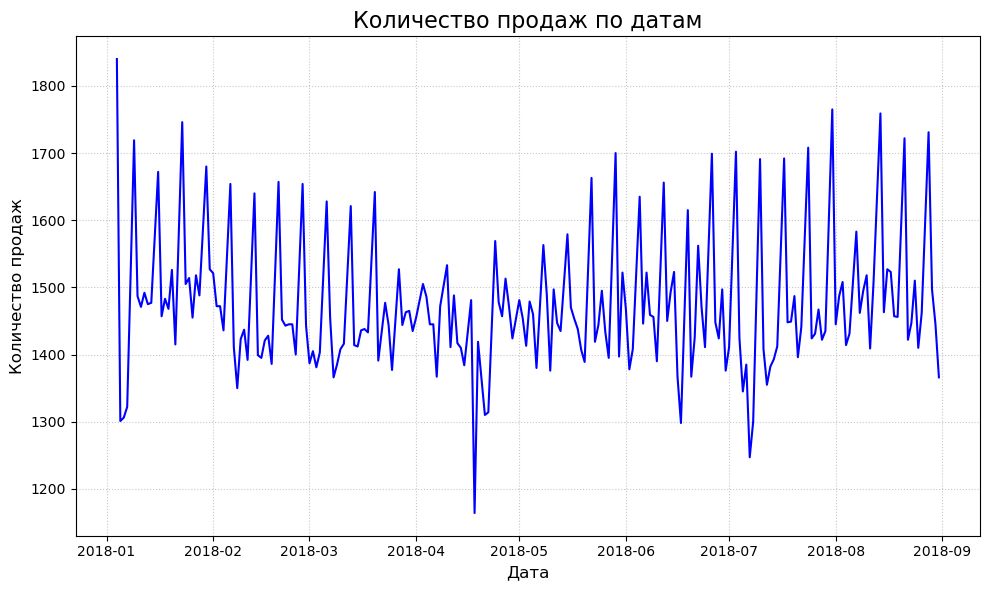

In [40]:
#Нарисуйте график продаж у `grouped_df`
#Опишите что вы видите на графике. Ваша задача - максимально описать график
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], color='blue', linewidth=1.5)
plt.title('Количество продаж по датам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

На графике "Количество продаж по датам" можно наблюдать общую динамику продаж за период с января по август 2018 года.

**Основные наблюдения:**
* **Дневные/еженедельные колебания:** Продажи демонстрируют выраженные колебания изо дня в день или от недели к неделе, что характерно для многих видов бизнеса. Это может быть связано с тем, что в определенные дни недели (например, в выходные или дни зарплат) покупательская активность выше.
* **Отсутствие ярко выраженного общего тренда:** На первый взгляд, нет сильного общего восходящего или нисходящего тренда продаж за весь период. Продажи колеблются вокруг некоторого среднего уровня.
* **Пиковые и минимальные значения:** На графике могут быть видны отдельные дни с аномально высоким или низким количеством продаж. Высокие пики могут указывать на успешные акции, праздники или другие специальные события, а низкие значения – на выходные дни, государственные праздники или проблемы с логистикой/поставками.
* **Отсутствие явной сезонности (в рамках года):** Поскольку данные охватывают только часть года (январь-август), сложно делать выводы о годовой сезонности. Однако, можно предположить, что летние месяцы (июнь-август) могут иметь свою специфическую динамику по сравнению с зимними.

**Для более глубокого анализа можно было бы:**
* Добавить скользящее среднее для сглаживания дневных колебаний и выявления более долгосрочных трендов.
* Изучить влияние дней недели и праздников на продажи.
* Сравнить продажи с предыдущими годами, если данные доступны.

In [31]:
#"Выброс" здесь интерпретируется как строка с максимальным значением в столбце 'Количество'.
max_sales_row = df.loc[df['Количество'].idxmax()]
print("\n--- Строка с максимальным количеством продаж (по столбцу 'Количество') ---")
print(max_sales_row)


--- Строка с максимальным количеством продаж (по столбцу 'Количество') ---
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


In [32]:
#Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)
#Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

if not pd.api.types.is_datetime64_any_dtype(df['Дата']):
    df['Дата'] = pd.to_datetime(df['Дата'])

filtered_sales = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.dayofweek == 2) # Среда = 2 (понедельник = 0, вторник = 1, среда = 2)
]

top_product = filtered_sales.groupby('Номенклатура')['Количество'].sum().nlargest(1)

print("\n--- Топовый товар по продажам по средам (июнь-август) у 3 склада ---")
print(top_product)


--- Топовый товар по продажам по средам (июнь-август) у 3 склада ---
Номенклатура
product_1    2267
Name: Количество, dtype: int64



--- Проверка merged_df после объединения (для задачи по погоде) ---
        Дата  Количество продаж        T
0 2018-01-04               1840 -14.0750
1 2018-01-05               1301 -16.8625
2 2018-01-06               1306 -13.3000
3 2018-01-07               1322 -12.7500
4 2018-01-09               1719  -6.2500
Количество строк в merged_df: 205
Диапазон дат в merged_df: 2018-01-04 00:00:00 - 2018-08-31 00:00:00


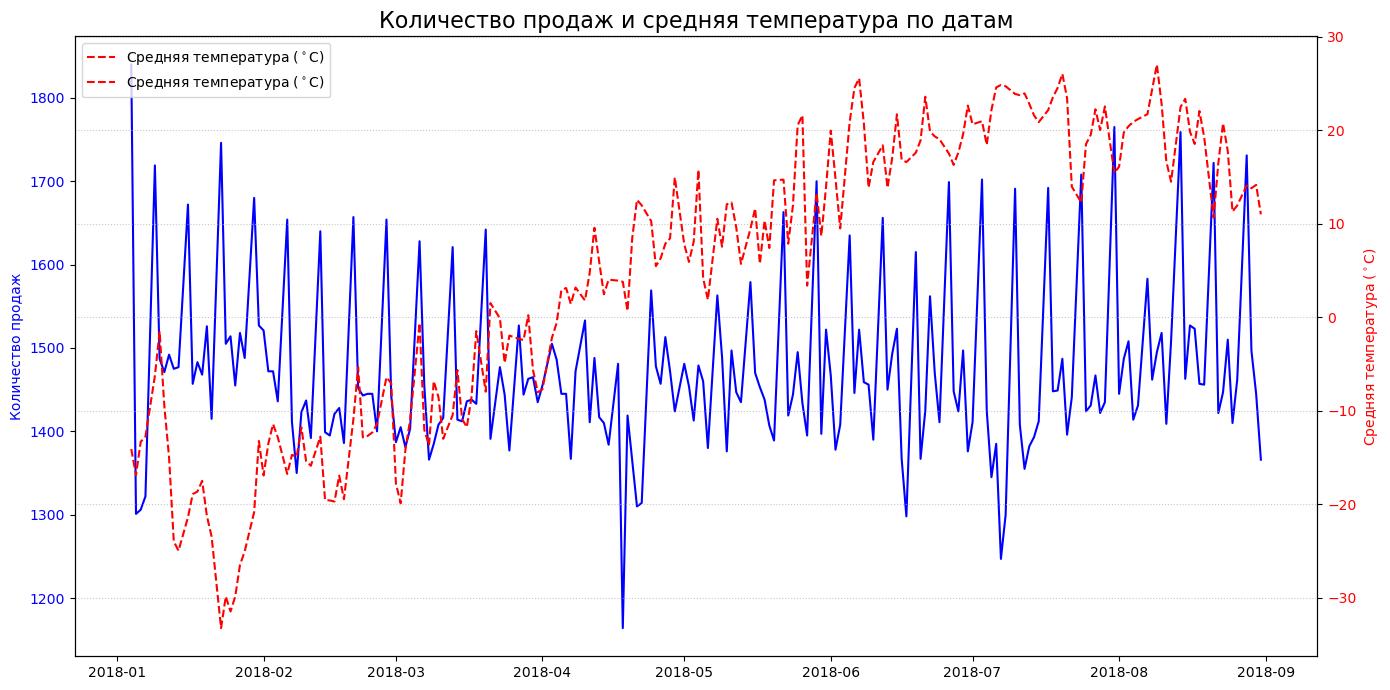

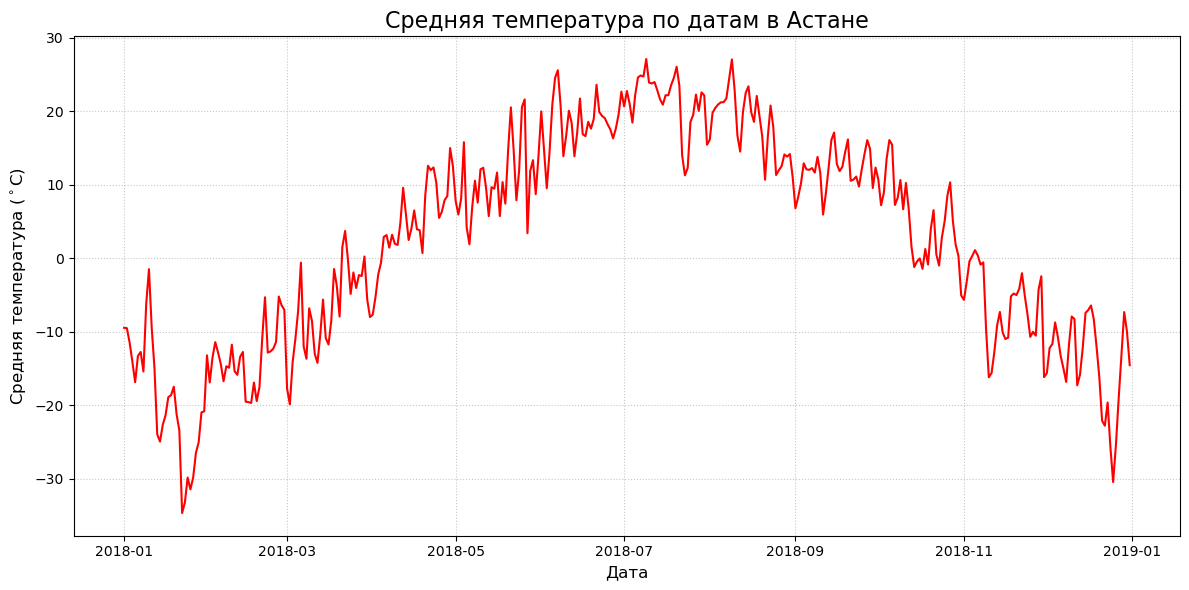

In [33]:
#                                 --- ЗАГРУЗКА И ОБРАБОТКА ДАННЫХ О ПОГОДЕ ---
#                          Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане
#            (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день),
#      объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. 
#                             А также отдельно график температуры.

try:
      weather_df = pd.read_csv('weather_astana.csv', sep=';', encoding='cp1251', skiprows=6,
                             index_col=0, parse_dates=True, dayfirst=True)
except UnicodeDecodeError:
    weather_df = pd.read_csv('weather_astana.csv', sep=';', encoding='utf-8', skiprows=6,
                             index_col=0, parse_dates=True, dayfirst=True)
except FileNotFoundError:
    print("Ошибка: файл 'weather_astana.csv' не найден. Пожалуйста, убедитесь, что файл находится в той же директории.")
    exit()

weather_df.reset_index(inplace=True)
weather_df = weather_df.rename(columns={'index': 'Дата'})

if 'Местное время в Астане' in weather_df.columns:
    weather_df = weather_df.rename(columns={'Местное время в Астане': 'Температура'})
    temp_column_name = 'Температура'
else:
    print("Внимание: Столбец 'Местное время в Астане' не найден. Пожалуйста, проверьте имя столбца температуры.")
       temp_column_name = 'T'

weather_df[temp_column_name] = weather_df[temp_column_name].astype(str).str.replace(',', '.')
weather_df[temp_column_name] = pd.to_numeric(weather_df[temp_column_name], errors='coerce')
weather_df.dropna(subset=[temp_column_name], inplace=True)
weather_df['Дата'] = weather_df['Дата'].dt.date

daily_temp = weather_df.groupby('Дата')[temp_column_name].mean().reset_index()
daily_temp = daily_temp.rename(columns={temp_column_name: 'T'}) 
daily_temp['Дата'] = pd.to_datetime(daily_temp['Дата'])

merged_df = pd.merge(grouped_df, daily_temp, on='Дата', how='inner')

print("\n--- Проверка merged_df после объединения (для задачи по погоде) ---")
print(merged_df.head())
print(f"Количество строк в merged_df: {len(merged_df)}")
print(f"Диапазон дат в merged_df: {merged_df['Дата'].min()} - {merged_df['Дата'].max()}")

if merged_df.empty:
    print("После объединения DataFrame пуст. Возможно, нет общих дат в данных о продажах и погоде.")
else:
    plt.figure(figsize=(14, 7))
    plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж', color='blue', linewidth=1.5)
    plt.ylabel('Количество продаж', color='blue')
    plt.tick_params(axis='y', labelcolor='blue')

    ax2 = plt.twinx()
    # Использование 'r' для сырой строки, чтобы избежать SyntaxWarning
    ax2.plot(merged_df['Дата'], merged_df['T'], label=r'Средняя температура ($^\circ$C)', color='red', linestyle='--', linewidth=1.5)
    ax2.set_ylabel(r'Средняя температура ($^\circ$C)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title('Количество продаж и средняя температура по датам', fontsize=16)
    plt.xlabel('Дата', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.7)
    lines, labels = plt.gca().get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_temp['Дата'], daily_temp['T'], color='red', linewidth=1.5)
    plt.title('Средняя температура по датам в Астане', fontsize=16)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel(r'Средняя температура ($^\circ$C)', fontsize=12) 
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()